In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [42]:
# important areas in the function
x0 = 0
x1 = 2
x2 = 4
x3 = 20
N = 1

# the function
f01 = lambda x: 0
f12 = lambda x: 1-np.cos(2*np.pi*(x-x1)/(x2-x1))
f23 = lambda x: 0

# squares for the norm
f01_squared = lambda x: 0
f12_squared = lambda x: (1-np.cos(2*np.pi*(x-x1)/(x2-x1)))**2
f23_squared = lambda x: 0

In [43]:
# PART (A)
area = 0
area += quad(f01_squared, x0, x1)[0]
area += quad(f12_squared, x1, x2)[0]
area += quad(f23_squared, x2, x3)[0]
N = 1 / area ** (1/2)
print("The value of N is:", N)

The value of N is: 0.5773502691896258


Graphing the difference:


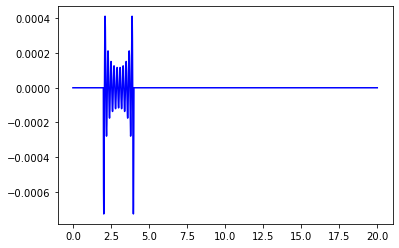

In [44]:
# PART (B)
# to graph the original psi(x)
x_original = []
y_original = []
x_min = 0
x_max = 20
x_steps = 1000
for x in range(x_min * x_steps, x_max * x_steps + 1, 1):
    x = x / x_steps
    x_original.append(x)
    if x < x1:
        y_original.append(f01(x))
    elif x < x2:
        y_original.append(f12(x))
    else:
        y_original.append(f23(x))

# to calculate our fourier transform (letting h bar be 1)
J = 100
L = x3 - x0
psi_tilde = np.zeros(2 * J + 1, dtype=complex)
for m in range(-J, J + 1):
    fpr = lambda x: np.cos(2 * np.pi * m * x / L) * (1-np.cos(2*np.pi*(x-x1)/(x2-x1)))
    fpi = lambda x: np.sin(2 * np.pi * m * x / L) * (1-np.cos(2*np.pi*(x-x1)/(x2-x1)))
    fxr = quad(fpr, x1, x2)[0]
    fxi = quad(fpi, x1, x2)[0]
    psi_tilde[m] = (fxr + 1j*fxi) / (L) ** (1/2)

# get our function in terms of x
psi = np.zeros((x_max - x_min) * x_steps + 1, dtype=complex)
x_modified = []
y_modified = []

# tranform back
for x in range(x_min * x_steps, x_max * x_steps + 1, 1):
    n = x - x_min * x_steps
    x = x / x_steps
    x_modified.append(x)
    if x <= x1 or x2 <= x:
        y_modified.append(0)
    else:
        psi[n] = 0 + 0j
        for m in range(-J, J + 1):
            psi[n] = psi[n] + psi_tilde[m] * np.e ** (-2j * np.pi * m * x / L) / (L) ** (1/2)
        y_modified.append(psi[n].real)

# get the difference
x_diff = []
y_diff = []

for x in range(x_min * x_steps, x_max * x_steps + 1, 1):
    x_diff.append(x / x_steps)
    y_diff.append((y_original[x - x_min * x_steps] - y_modified[x - x_min * x_steps]) * N)

# graph the difference
print("Graphing the difference:")
plt.plot(x_diff, y_diff, 'b-')

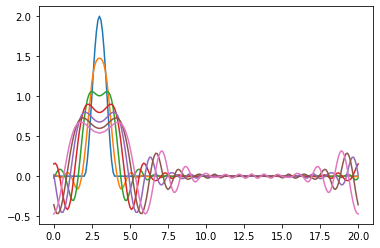

In [50]:
# PART(C)
x_steps = 100
for n_t in range(7):
    t = 0.2 * n_t
    x = []
    y = []
    psi2 = np.zeros((x_max - x_min) * x_steps + 1, dtype=complex)
    for xt in range(x_min * x_steps, x_max * x_steps + 1, 1):
        n = xt - x_min * x_steps
        xt = xt / x_steps
        x.append(xt)
        if xt <= x1 or x2 <= xt:
            psi2[n] = 0 + 0j
            for m in range(-J, J + 1):
                psi2[n] = psi2[n] + psi_tilde[m] * np.e ** (-2j * np.pi * m * xt / L) / (L) ** (1/2) * np.e ** (-1j * (2 * np.pi * m / L) ** 2 * t / 2)
            y.append(psi2[n].real)
        else:
            psi2[n] = 0 + 0j
            for m in range(-J, J + 1):
                psi2[n] = psi2[n] + psi_tilde[m] * np.e ** (-2j * np.pi * m * xt / L) / (L) ** (1/2) * np.e ** (-1j * (2 * np.pi * m / L) ** 2 * t / 2)
            y.append(psi2[n].real)
    plt.plot(x, y)

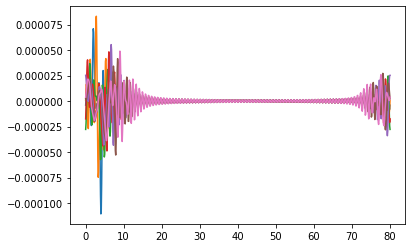

In [59]:
# PART(D)
L = 80
x_max = 80
x_steps = 10

# to calculate our fourier transform (letting h bar be 1)
J = 100
L = 80
psi_tilde = np.zeros(2 * J + 1, dtype=complex)
for m in range(-J, J + 1):
    fpr = lambda x: np.cos(2 * np.pi * m * x / L + 60 * x) * (1-np.cos(2*np.pi*(x-x1)/(x2-x1)))
    fpi = lambda x: np.sin(2 * np.pi * m * x / L + 60 * x) * (1-np.cos(2*np.pi*(x-x1)/(x2-x1)))
    fxr = quad(fpr, x1, x2)[0]
    fxi = quad(fpi, x1, x2)[0]
    psi_tilde[m] = (fxr + 1j*fxi) / (L) ** (1/2)

for n_t in range(7):
    t = 0.2 * n_t
    x = []
    y = []
    psi2 = np.zeros((x_max - x_min) * x_steps + 1, dtype=complex)
    for xt in range(x_min * x_steps, x_max * x_steps + 1, 1):
        n = xt - x_min * x_steps
        xt = xt / x_steps
        x.append(xt)
        if xt <= x1 or x2 <= xt:
            psi2[n] = 0 + 0j
            for m in range(-J, J + 1):
                psi2[n] = psi2[n] + psi_tilde[m] * np.e ** (-2j * np.pi * m * xt / L) / (L) ** (1/2) * np.e ** (-1j * (2 * np.pi * m / L) ** 2 * t / 2)
            y.append(psi2[n].real)
        else:
            psi2[n] = 0 + 0j
            for m in range(-J, J + 1):
                psi2[n] = psi2[n] + psi_tilde[m] * np.e ** (-2j * np.pi * m * xt / L) / (L) ** (1/2) * np.e ** (-1j * (2 * np.pi * m / L) ** 2 * t / 2)
            y.append(psi2[n].real)
    plt.plot(x, y)